In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Directory path
directory_path = 'data/sensor_data_clean_cal'

# Define your date range
start_date = '2020-9-1'
end_date = '2023-5-30'

# Convert string dates to matplotlib understandable format
start_date = mdates.datestr2num(start_date)
end_date = mdates.datestr2num(end_date)

# Add standard color palette 
pp = sns.color_palette('Paired', 12)

p = {
    'left_30': pp[0],   # Light Blue
    'right_30': pp[1],  # Dark Blue
    'left_60': pp[2],   # Light Green
    'right_60': pp[3],  # Dark Green
    'left_90': pp[4],   # Light Red
    'right_90': pp[5]   # Dark Red
}
# Iterate over all CSV files in the directory
for filename in os.listdir(directory_path):
    if filename.startswith("patch"):
        # Load the data
        data = pd.read_csv(os.path.join(directory_path, filename), sep=',')
        patch = filename.split("_")[1].split(".")[0]

        # Convert the 'dateTime' column to a datetime object
        data['dateTime'] = pd.to_datetime(data['dateTime'])

        # Create a new column 'side_depth' that concatenates 'side' and 'depth' columns
        data['side_depth'] = data['side'] + '_' + data['depth'].astype(str)

        # Create a new figure
        plt.figure(figsize=(15, 8))
        
        # Plot the data
        sns.lineplot(data=data.dropna(), x='dateTime', y='cal_wc', hue='side_depth', palette = p)

        # Set the title, x-label, y-label, and legend
        plt.title(f'Time Series of Water Content by Depth for Patch {patch}')
        plt.xlabel('Date')
        plt.ylabel('Water Content (wc)')
        plt.legend(title='Side_Depth', loc = 'lower right')
        plt.grid(True)
        plt.xlim(start_date, end_date)
        plt.ylim(0,35)

        # Show the plot
        plt.show()


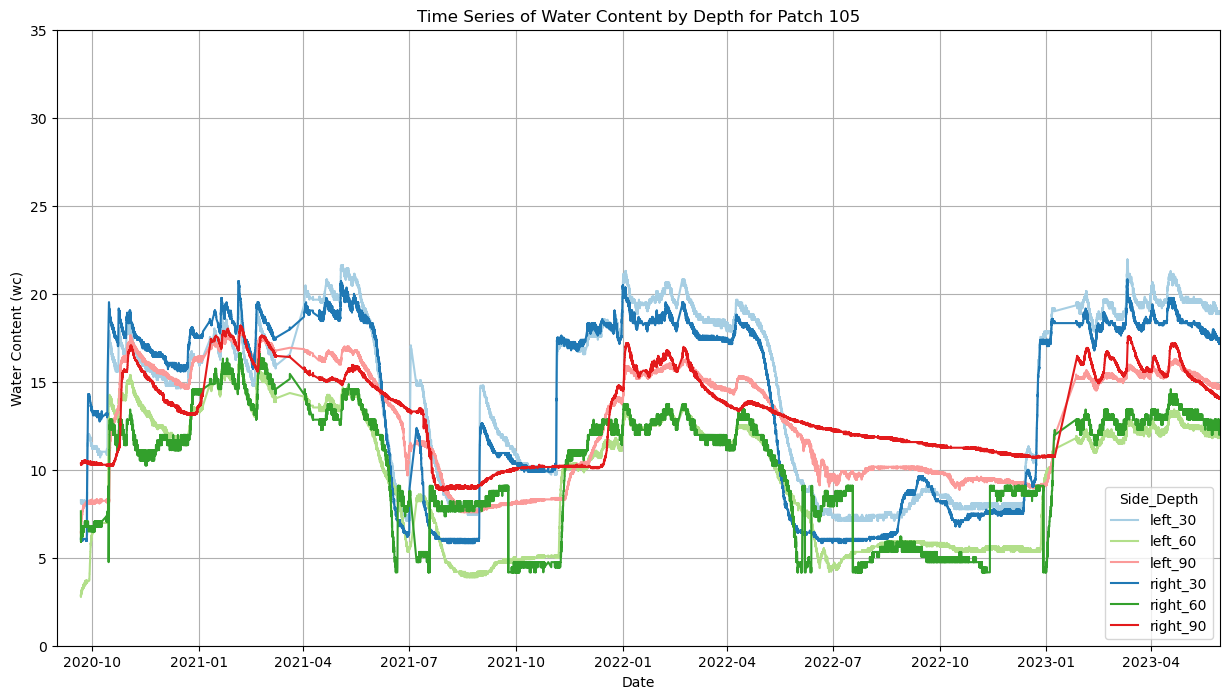

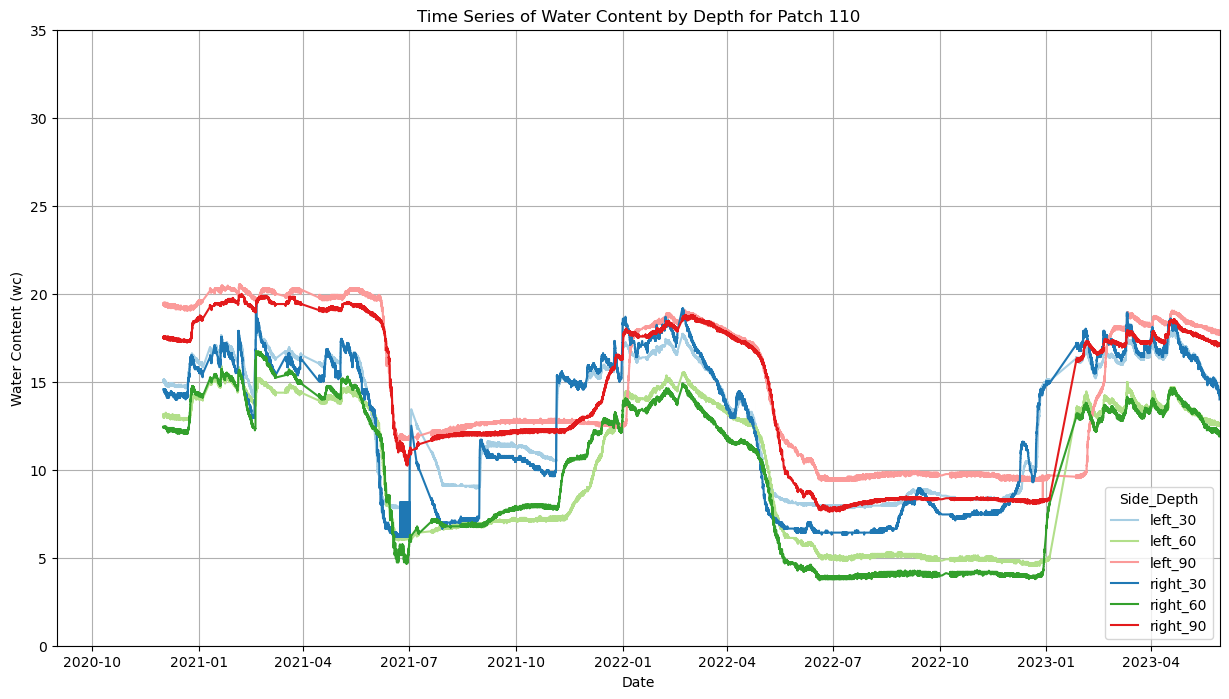

In [1]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import seaborn as sns

# # Directory path
# directory_path = 'data/sensor_data_clean_cal'

# # Define your date range
# start_date = '2020-9-1'
# end_date = '2023-5-30'

# # Convert string dates to matplotlib understandable format
# start_date = mdates.datestr2num(start_date)
# end_date = mdates.datestr2num(end_date)

# # Add standard color palette 
# pp = sns.color_palette('Paired', 12)

# p = {
#     'left_30': pp[0],   # Light Blue
#     'right_30': pp[1],  # Dark Blue
#     'left_60': pp[2],   # Light Green
#     'right_60': pp[3],  # Dark Green
#     'left_90': pp[4],   # Light Red
#     'right_90': pp[5]   # Dark Red
# }
# # Iterate over all CSV files in the directory
# for filename in os.listdir(directory_path):
#     if filename.startswith("patch_105") or filename.startswith("patch_110"):

#         # Load the data
#         data = pd.read_csv(os.path.join(directory_path, filename), sep=',')
#         patch = filename.split("_")[1].split(".")[0]

#         # Convert the 'dateTime' column to a datetime object
#         data['dateTime'] = pd.to_datetime(data['dateTime'])

#         # Create a new column 'side_depth' that concatenates 'side' and 'depth' columns
#         data['side_depth'] = data['side'] + '_' + data['depth'].astype(str)

#         # Create a new figure
#         plt.figure(figsize=(15, 8))
        
#         # Plot the data
#         sns.lineplot(data=data.dropna(), x='dateTime', y='cal_wc', hue='side_depth', palette = p)

#         # Set the title, x-label, y-label, and legend
#         plt.title(f'Time Series of Water Content by Depth for Patch {patch}')
#         plt.xlabel('Date')
#         plt.ylabel('Water Content (wc)')
#         plt.legend(title='Side_Depth', loc = 'lower right')
#         plt.grid(True)
#         plt.xlim(start_date, end_date)
#         plt.ylim(0,35)

#         # Show the plot
#         plt.show()
